In [48]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 
Here we will load the dataset, then split it into train, validation and test data. 
As the Credit Card data is biased, we also create a downzised dataset.

In [49]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

# Extracting all datapoints where the output is 1 (i.e paying credit card dept).
indices = np.where(y == 1)
indices_zero = np.where(y == 0)
# Randomly extracting equal amount of datapoints where the output is 0 (i.e defaulting).
datapoints = np.random.choice(indices_zero[0], size=y[indices[0]].shape[0], replace=False)

#Stacking the two datasets
x_new = np.vstack((x[indices[0],:],x[datapoints,:]))
y_new = np.vstack((y[indices[0]],y[datapoints]))

# B) 
Egen logistic regression med gradient descent.


In [50]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()
for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, solver='gd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
# Normalising error and confusion matrices over k-folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k

    

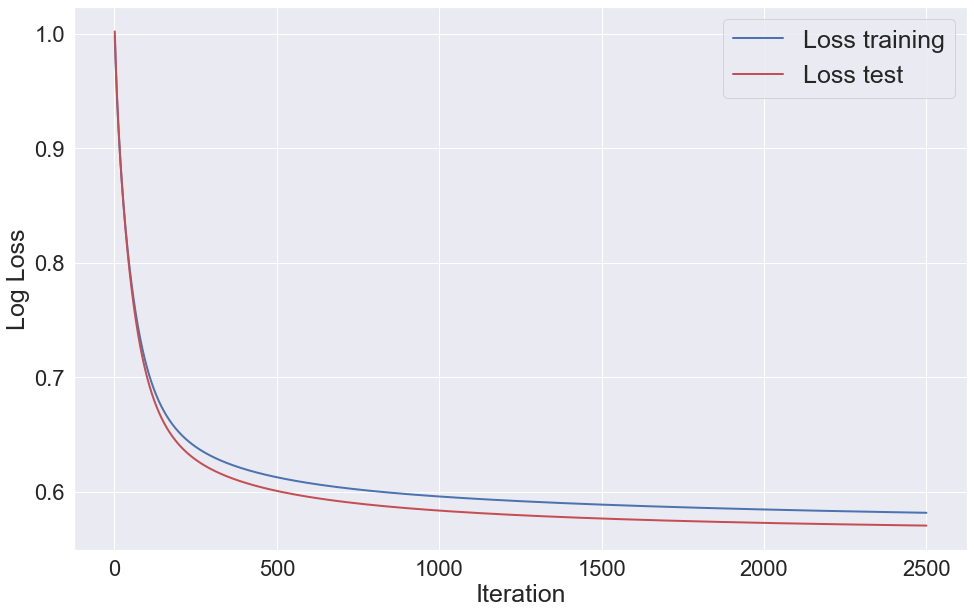

In [51]:
# Plotting the training and test loss for the k-th fold.
sns.set(font_scale=2)
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

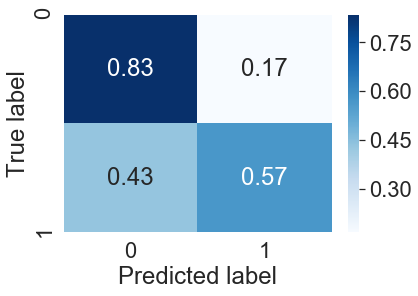

In [52]:
# plotting the normalized confusion matrix averaged over k folds
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      


# Accuracy. 
Både egen kode og tester med scikit. 

In [53]:
# Printing the accuracy metrics averaged over k folds. 
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

70.25503922128937 % Training accuracy
70.17052262017367 % Test accuracy
0.6570919094854021 % Training f1 score
0.6558895866600732 % Test f1 score


# Egen logistisk regresjon med stokastisk gradient descent

In [54]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()
for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, batch_size=int(len(y_new)/20), solver='sgd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)

# Normalising error and confusion matrices over k-folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k


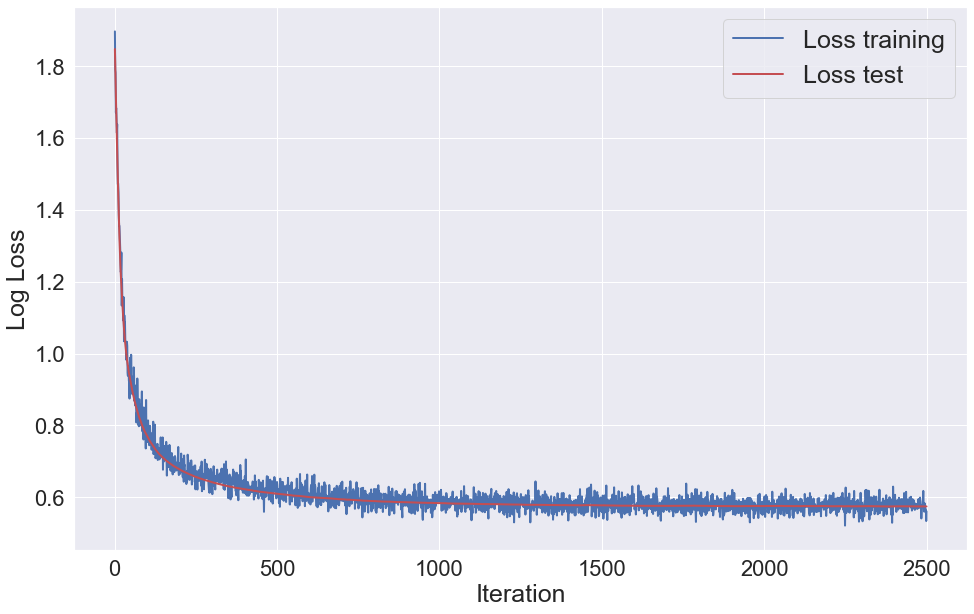

In [55]:
# plotting the normalized confusion matrix averaged over k folds
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

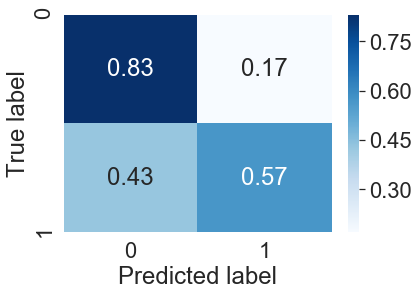

In [56]:
# plotting the normalized confusion matrix averaged over k folds
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 

In [57]:
# Printing the accuracy metrics averaged over k folds. 
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

70.21923213437142 % Training accuracy
69.98953566650475 % Test accuracy
0.6572850503226003 % Training f1 score
0.655003532462244 % Test f1 score


In [58]:
# comparing with scikit learn
model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_

print(accuracy, '% Training Accuracy')


predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_

print(accuracy, '% Test Accuracy')

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70.71563088512242 % Training Accuracy
71.15384615384616 % Test Accuracy


# C) 
Neural Network. 

In [59]:
# Grid search to find best values for lambda and eta.
epochs=1000
batch_size=int(len(ytrain)/20)
n_features=x.shape[1]
etavec = np.logspace(-6, -1, 6)
lmbvec = np.logspace(-6, -1, 6)
lmbvec[0]=0

# defining the activation functions
activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]


k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
norm = np.zeros([2,2])
accuracy_train = np.zeros((len(etavec), len(lmbvec)))
accuracy_test = np.zeros((len(etavec), len(lmbvec)))
f1_train = np.zeros((len(etavec), len(lmbvec)))
f1_test = np.zeros((len(etavec), len(lmbvec)))
test_loss = np.zeros((len(etavec), len(lmbvec)))
test_f1 = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        
        for kf in range(k):
            xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
            xtrain = np.concatenate(xtrain,axis=0)
            ytrain = y_folds[np.arange(len(y_folds))!=kf]
            ytrain = np.concatenate(ytrain,axis=0)
            xtest  = x_folds[kf]
            ytest  = y_folds[kf]
            
            np.random.seed(2019) # keep this constant to initialize weights equally.
            # Creating the network and defining hyperparamters
            neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 10e-04,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')
            # Adding layers
            neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)
            # Training network
            neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=False)

            pred = neural_net.feed_out(xtest, activation)
            test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
            test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
            classified=np.round(pred)
            
            accuracy_test[i,j] += 100*np.sum(classified==ytest)/len(classified)
            f1_test[i,j] += f1_score(ytest, classified)
            norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
            classified=np.round(neural_net.feed_out(xtrain, activation))   
            accuracy_train[i,j] += 100*np.sum(classified==ytrain)/len(classified)
            f1_train[i,j] += f1_score(ytrain, classified)
        print('test loss for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', test_loss [i,j]/k)

# Average performance metrics over k folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k



test loss for η = 1e-06 & λ = 0.0 = 0.7493531451538801
test loss for η = 1e-06 & λ = 1e-05 = 0.7493531445937602
test loss for η = 1e-06 & λ = 0.0001 = 0.7493531395526807
test loss for η = 1e-06 & λ = 0.001 = 0.7493530891418304
test loss for η = 1e-06 & λ = 0.01 = 0.7493525850281463
test loss for η = 1e-06 & λ = 0.1 = 0.7493475433732791
test loss for η = 1e-05 & λ = 0.0 = 0.7492655336602003
test loss for η = 1e-05 & λ = 1e-05 = 0.7492655281042522
test loss for η = 1e-05 & λ = 0.0001 = 0.7492654781006696
test loss for η = 1e-05 & λ = 0.001 = 0.7492649780597749
test loss for η = 1e-05 & λ = 0.01 = 0.7492599771443781
test loss for η = 1e-05 & λ = 0.1 = 0.7492099175659599
test loss for η = 0.0001 & λ = 0.0 = 0.7484033713507673
test loss for η = 0.0001 & λ = 1e-05 = 0.7484033202774272
test loss for η = 0.0001 & λ = 0.0001 = 0.7484028606133774
test loss for η = 0.0001 & λ = 0.001 = 0.74839826357824
test loss for η = 0.0001 & λ = 0.01 = 0.7483522538219938
test loss for η = 0.0001 & λ = 0.1 = 0

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


test loss for η = 0.01 & λ = 0.1 = 0.7243218351801486
test loss for η = 0.1 & λ = 0.0 = 0.6792935904873351
test loss for η = 0.1 & λ = 1e-05 = 0.6796007635072412
test loss for η = 0.1 & λ = 0.0001 = 0.679722449504497
test loss for η = 0.1 & λ = 0.001 = 0.6796211278385426
test loss for η = 0.1 & λ = 0.01 = 0.7225038216102551
test loss for η = 0.1 & λ = 0.1 = 0.724405391032945


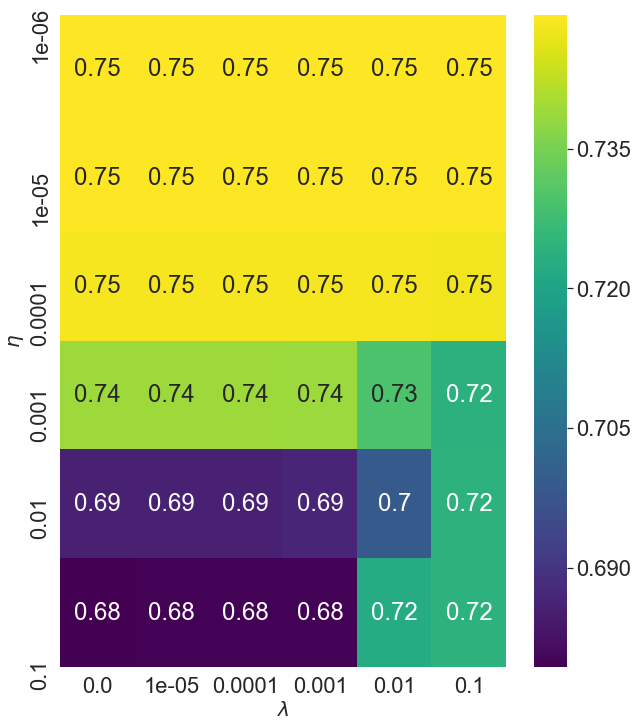

In [60]:
yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(test_loss, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_ylabel("$\eta$", fontsize=20)
ax.set_xlabel("$\lambda$", fontsize=20)
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [61]:
# Extract optimal parameters. 
best_eta_index, best_lmb_index = np.where(test_loss == np.min(test_loss))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 
print('eta=',best_eta)
print('lmb=',best_lmb)

eta= [0.1]
lmb= [0.]


In [62]:
# Run again with optimal paramteres (i know this strictly is not necessary)

norm = np.zeros([2,2])
accuracy_test = 0
f1_test = 0 
accuracy_train = 0
f1_train = 0 
for kf in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=kf]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[kf]
    ytest  = y_folds[kf]
            
    np.random.seed(2019)
    neural_net = nn.ANN(lmb=best_lmb, bias=0, eta=best_eta,early_stop_tol = 0,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
    neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

    neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=True)

    pred = neural_net.feed_out(xtest, activation)
    test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
    test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
    classified=np.round(pred)
            
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
    classified=np.round(neural_net.feed_out(xtrain, activation))   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
# Average
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k
cost_test, cost_train = neural_net.costs()

Epoch 1 loss 0.7458130084867618
Epoch 2 loss 0.7448818732555612
Epoch 3 loss 0.7441793818498574
Epoch 4 loss 0.7443637331147601
Epoch 5 loss 0.7425390328324223
Epoch 6 loss 0.7401980014522732
Epoch 7 loss 0.7373210782092825
Epoch 8 loss 0.7340576936182678
Epoch 9 loss 0.7313549421749802
Epoch 10 loss 0.7277951550574303
Epoch 11 loss 0.7245165005709218
Epoch 12 loss 0.7207951718602316
Epoch 13 loss 0.7180133179692898
Epoch 14 loss 0.7154122135269819
Epoch 15 loss 0.7135289239486763
Epoch 16 loss 0.7113443754804619
Epoch 17 loss 0.7103195788247981
Epoch 18 loss 0.7091770011280747
Epoch 19 loss 0.7082163521104232
Epoch 20 loss 0.7074017172575916
Epoch 21 loss 0.7057060407881238
Epoch 22 loss 0.7044800149280719
Epoch 23 loss 0.7033731040369141
Epoch 24 loss 0.7024843094886688
Epoch 25 loss 0.7014106171103514
Epoch 26 loss 0.7016219987904344
Epoch 27 loss 0.7001969059700629
Epoch 28 loss 0.6988201819210005
Epoch 29 loss 0.6981967180208024
Epoch 30 loss 0.6983057493303928
Epoch 31 loss 0.698

Epoch 247 loss 0.6833602187030627
Epoch 248 loss 0.6838036278293216
Epoch 249 loss 0.682152837717999
Epoch 250 loss 0.6831654894108282
Epoch 251 loss 0.682119391527593
Epoch 252 loss 0.6824468629847817
Epoch 253 loss 0.6829989195836065
Epoch 254 loss 0.6832995261900413
Epoch 255 loss 0.6826061318466086
Epoch 256 loss 0.6831720253514109
Epoch 257 loss 0.6832628760343311
Epoch 258 loss 0.6827728905717172
Epoch 259 loss 0.6828990398543445
Epoch 260 loss 0.6826314597752718
Epoch 261 loss 0.6825797220734164
Epoch 262 loss 0.6828408653954146
Epoch 263 loss 0.6826987841239858
Epoch 264 loss 0.6835878171358171
Epoch 265 loss 0.6830724081703597
Epoch 266 loss 0.6828066629523629
Epoch 267 loss 0.682892633640292
Epoch 268 loss 0.682724760325876
Epoch 269 loss 0.6824774889796853
Epoch 270 loss 0.683445683102338
Epoch 271 loss 0.6834838204969159
Epoch 272 loss 0.6828259819095169
Epoch 273 loss 0.6828870812769786
Epoch 274 loss 0.6830630073578146
Epoch 275 loss 0.683512662839813
Epoch 276 loss 0.682

Epoch 90 loss 0.6782119149922178
Epoch 91 loss 0.6785697182007999
Epoch 92 loss 0.6786077399674932
Epoch 93 loss 0.678958364690148
Epoch 94 loss 0.6786944546381748
Epoch 95 loss 0.6787234813512818
Epoch 96 loss 0.6778312216075155
Epoch 97 loss 0.6778785704578404
Epoch 98 loss 0.6778396785046064
Epoch 99 loss 0.6784206492367019
Epoch 100 loss 0.6776339130783599
Epoch 101 loss 0.6776403971439692
Epoch 102 loss 0.6781489038887665
Epoch 103 loss 0.6772800978512962
Epoch 104 loss 0.6776891245594897
Epoch 105 loss 0.6780361914341575
Epoch 106 loss 0.6777586899029565
Epoch 107 loss 0.6768632315442022
Epoch 108 loss 0.6765622874158529
Epoch 109 loss 0.6773267128856588
Epoch 110 loss 0.6773324982479981
Epoch 111 loss 0.6762187103523056
Epoch 112 loss 0.6762969635419166
Epoch 113 loss 0.6767171239934096
Epoch 114 loss 0.676516835471071
Epoch 115 loss 0.6764786313809878
Epoch 116 loss 0.6766980671297065
Epoch 117 loss 0.6771353689449556
Epoch 118 loss 0.6767532751850154
Epoch 119 loss 0.676444641

Epoch 333 loss 0.6732972808981167
Epoch 334 loss 0.6732416557870471
Epoch 335 loss 0.6733258873639593
Epoch 336 loss 0.6732620110263946
Epoch 337 loss 0.6735308732735316
Epoch 338 loss 0.6735590237470176
Epoch 339 loss 0.6732081671430443
Epoch 340 loss 0.6737522760598302
Epoch 341 loss 0.6731838965405665
Epoch 342 loss 0.6744383215558348
Epoch 343 loss 0.6731736265746571
Epoch 344 loss 0.6733194653162767
Epoch 345 loss 0.6736986714512292
Epoch 346 loss 0.6731134160325618
Epoch 347 loss 0.6729719969786971
Epoch 348 loss 0.6735138618493606
Epoch 349 loss 0.6734925249816619
Epoch 350 loss 0.6732106063419648
Epoch 351 loss 0.6732150283738687
Epoch 352 loss 0.67348504501074
Epoch 353 loss 0.6733109075996092
Epoch 354 loss 0.6725656697205373
Epoch 355 loss 0.6729594918511884
Epoch 356 loss 0.674167721994329
Epoch 357 loss 0.674479074443975
Epoch 358 loss 0.6731710288388377
Epoch 359 loss 0.6736418895273867
Epoch 360 loss 0.6732911541696601
Epoch 361 loss 0.6740133297256521
Epoch 362 loss 0.6

Epoch 35 loss 0.6923511625846442
Epoch 36 loss 0.6915269253073218
Epoch 37 loss 0.6913426828309642
Epoch 38 loss 0.6917694677107243
Epoch 39 loss 0.6913022660038888
Epoch 40 loss 0.6908686940700576
Epoch 41 loss 0.6904453425505058
Epoch 42 loss 0.6907208989053913
Epoch 43 loss 0.6898376339454441
Epoch 44 loss 0.6899249690876837
Epoch 45 loss 0.6897123626845031
Epoch 46 loss 0.6886596887652779
Epoch 47 loss 0.6878660059535815
Epoch 48 loss 0.6881181360175443
Epoch 49 loss 0.6878065354152831
Epoch 50 loss 0.6872479318603807
Epoch 51 loss 0.6874737123249658
Epoch 52 loss 0.6871072529796342
Epoch 53 loss 0.6866301126796218
Epoch 54 loss 0.6864214842638707
Epoch 55 loss 0.6858715279013576
Epoch 56 loss 0.6855623247817115
Epoch 57 loss 0.6856039362933827
Epoch 58 loss 0.6867223769689889
Epoch 59 loss 0.686293818974013
Epoch 60 loss 0.6861411775360485
Epoch 61 loss 0.6863013368591036
Epoch 62 loss 0.6859901916027694
Epoch 63 loss 0.6855908225355355
Epoch 64 loss 0.6854703041495084
Epoch 65 lo

Epoch 280 loss 0.6771750275971834
Epoch 281 loss 0.6777585609530158
Epoch 282 loss 0.6771415782545955
Epoch 283 loss 0.6772767557041875
Epoch 284 loss 0.6773559008208094
Epoch 285 loss 0.6776246841065608
Epoch 286 loss 0.6778338754844123
Epoch 287 loss 0.6781044437486219
Epoch 288 loss 0.6776862237228566
Epoch 289 loss 0.677379394921351
Epoch 290 loss 0.6773639857732773
Epoch 291 loss 0.6775735837981652
Epoch 292 loss 0.6779582031011148
Epoch 293 loss 0.6775521437363458
Epoch 294 loss 0.6775083237642697
Epoch 295 loss 0.677850702178187
Epoch 296 loss 0.6771494716789626
Epoch 297 loss 0.6771869087752844
Epoch 298 loss 0.6770734165719884
Epoch 299 loss 0.6782775966445365
Epoch 300 loss 0.678303074721505
Epoch 301 loss 0.6782920012535972
Epoch 302 loss 0.6778321685114056
Epoch 303 loss 0.6771048938016969
Epoch 304 loss 0.6769147328899736
Epoch 305 loss 0.6771869422989756
Epoch 306 loss 0.6773004527830314
Epoch 307 loss 0.6772596981717833
Epoch 308 loss 0.677453470561919
Epoch 309 loss 0.6

Epoch 522 loss 0.6755852782786372
Epoch 523 loss 0.6759448041779368
Epoch 524 loss 0.6756407769837192
Epoch 525 loss 0.6762453167143462
Epoch 526 loss 0.676007604644177
Epoch 527 loss 0.6764983018795917
Epoch 528 loss 0.6761596551569238
Epoch 529 loss 0.6756892877713528
Epoch 530 loss 0.6755097861212722
Epoch 531 loss 0.6755177344280965
Epoch 532 loss 0.6756393618467569
Epoch 533 loss 0.6755188254035729
Epoch 534 loss 0.6759033641667376
Epoch 535 loss 0.675668700537859
Epoch 536 loss 0.675203004137842
Epoch 537 loss 0.6754427581421752
Epoch 538 loss 0.6760800465669363
Epoch 539 loss 0.6758713024032732
Epoch 540 loss 0.6764142664563423
Epoch 541 loss 0.6762519583210519
Epoch 542 loss 0.6764124914297205
Epoch 543 loss 0.674961515325469
Epoch 544 loss 0.6757525690760374
Epoch 545 loss 0.6752171979115263
Epoch 546 loss 0.6751386624312278
Epoch 547 loss 0.6755367249520634
Epoch 548 loss 0.6765114651559664
Epoch 549 loss 0.675803626594631
Epoch 550 loss 0.6754164048836823
Epoch 551 loss 0.67

Epoch 39 loss 0.6915339145832722
Epoch 40 loss 0.6909834162079964
Epoch 41 loss 0.6909032970007654
Epoch 42 loss 0.6916095395768604
Epoch 43 loss 0.6903943198122108
Epoch 44 loss 0.690569358272477
Epoch 45 loss 0.690783332581378
Epoch 46 loss 0.6898676316584257
Epoch 47 loss 0.6886734416694926
Epoch 48 loss 0.6893745642122353
Epoch 49 loss 0.6891065574179374
Epoch 50 loss 0.6885260058637307
Epoch 51 loss 0.6888524188022975
Epoch 52 loss 0.689070103565386
Epoch 53 loss 0.6884736451965597
Epoch 54 loss 0.6880344369515985
Epoch 55 loss 0.6873545593614087
Epoch 56 loss 0.6868995453256774
Epoch 57 loss 0.6869981735857928
Epoch 58 loss 0.6884257479978818
Epoch 59 loss 0.6874813582227673
Epoch 60 loss 0.6874544087388479
Epoch 61 loss 0.6885702368664717
Epoch 62 loss 0.6880652480969577
Epoch 63 loss 0.6870366831902498
Epoch 64 loss 0.6873779997900408
Epoch 65 loss 0.6874331816116096
Epoch 66 loss 0.6867145210110559
Epoch 67 loss 0.6867859609601407
Epoch 68 loss 0.6860189561792277
Epoch 69 loss

Epoch 284 loss 0.6802438045242994
Epoch 285 loss 0.6800710047490081
Epoch 286 loss 0.6804432747902174
Epoch 287 loss 0.6804581684867246
Epoch 288 loss 0.6810091863736917
Epoch 289 loss 0.680185862888889
Epoch 290 loss 0.6804004840147727
Epoch 291 loss 0.680154967076591
Epoch 292 loss 0.6803265312122497
Epoch 293 loss 0.6807093919533612
Epoch 294 loss 0.680460350550469
Epoch 295 loss 0.681126994539054
Epoch 296 loss 0.6802996301613676
Epoch 297 loss 0.6806870826117546
Epoch 298 loss 0.6803262389055468
Epoch 299 loss 0.6811289359764536
Epoch 300 loss 0.6821795226243217
Epoch 301 loss 0.6814951884225859
Epoch 302 loss 0.6809772376263232
Epoch 303 loss 0.6802094449024542
Epoch 304 loss 0.6800035207962952
Epoch 305 loss 0.6805185529144758
Epoch 306 loss 0.6803011968607569
Epoch 307 loss 0.6799275021594623
Epoch 308 loss 0.6799573012425533
Epoch 309 loss 0.679606294663807
Epoch 310 loss 0.6802404678017909
Epoch 311 loss 0.6801910655543301
Epoch 312 loss 0.6805217719881519
Epoch 313 loss 0.68

Epoch 528 loss 0.6781532836859113
Epoch 529 loss 0.6779610853432703
Epoch 530 loss 0.6774628001338734
Epoch 531 loss 0.6777009063957884
Epoch 532 loss 0.6778605807747401
Epoch 533 loss 0.6786224176458353
Epoch 534 loss 0.6785573564749598
Epoch 535 loss 0.6780520595470634
Epoch 536 loss 0.6775239194149719
Epoch 537 loss 0.6779964807621958
Epoch 538 loss 0.6784408709575545
Epoch 539 loss 0.6786619704948973
Epoch 540 loss 0.6781796593146654
Epoch 541 loss 0.6780405016581853
Epoch 542 loss 0.6784542790286254
Epoch 543 loss 0.6776916817780831
Epoch 544 loss 0.6790547976438299
Epoch 545 loss 0.6783213011802257
Epoch 546 loss 0.6778975375906002
Epoch 547 loss 0.6773746664424682
Epoch 548 loss 0.6790309097907282
Epoch 549 loss 0.6788028818138484
Epoch 550 loss 0.6775324514167089
Epoch 551 loss 0.6790117851421493
Epoch 552 loss 0.6779615953427383
Epoch 553 loss 0.6784907099682786
Epoch 554 loss 0.6784306837098034
Epoch 555 loss 0.6777468766204646
Epoch 556 loss 0.677933132120643
Epoch 557 loss 

Epoch 173 loss 0.6848158109407345
Epoch 174 loss 0.6852080420648423
Epoch 175 loss 0.6846212232013503
Epoch 176 loss 0.6844920989706115
Epoch 177 loss 0.6844648506936868
Epoch 178 loss 0.6843682020893525
Epoch 179 loss 0.6851180236993004
Epoch 180 loss 0.6851661411657667
Epoch 181 loss 0.6838874656125267
Epoch 182 loss 0.6846474822509243
Epoch 183 loss 0.6844348429884001
Epoch 184 loss 0.68439727823411
Epoch 185 loss 0.6848781991257852
Epoch 186 loss 0.6844873369192999
Epoch 187 loss 0.6841186149921314
Epoch 188 loss 0.6847610611617978
Epoch 189 loss 0.6839906209834983
Epoch 190 loss 0.6851536207203465
Epoch 191 loss 0.6843102561954373
Epoch 192 loss 0.6839278769525345
Epoch 193 loss 0.6836981900931218
Epoch 194 loss 0.6844374015303065
Epoch 195 loss 0.6839299057516133
Epoch 196 loss 0.6829875837498421
Epoch 197 loss 0.6838240832179833
Epoch 198 loss 0.6846995872743726
Epoch 199 loss 0.6838948209779346
Epoch 200 loss 0.6838343861494545
Epoch 201 loss 0.6835447605483264
Epoch 202 loss 0

Epoch 415 loss 0.6821112815487552
Epoch 416 loss 0.6817654007488433
Epoch 417 loss 0.6818972389465662
Epoch 418 loss 0.6825889976022046
Epoch 419 loss 0.6820441942029363
Epoch 420 loss 0.6819165106148654
Epoch 421 loss 0.681172781798649
Epoch 422 loss 0.6813018399467197
Epoch 423 loss 0.6812956114805181
Epoch 424 loss 0.6816663333122888
Epoch 425 loss 0.6817273649966837
Epoch 426 loss 0.6810431949208221
Epoch 427 loss 0.6812385420202509
Epoch 428 loss 0.6822451475138254
Epoch 429 loss 0.682011947982634
Epoch 430 loss 0.6809060423797192
Epoch 431 loss 0.6807184189094194
Epoch 432 loss 0.6810058838872092
Epoch 433 loss 0.6808502677365995
Epoch 434 loss 0.6817085069272539
Epoch 435 loss 0.6816814931734738
Epoch 436 loss 0.6820443909280072
Epoch 437 loss 0.6817748888823651
Epoch 438 loss 0.6819338415601732
Epoch 439 loss 0.6817415707554255
Epoch 440 loss 0.6817942402512555
Epoch 441 loss 0.6817417131368052
Epoch 442 loss 0.681722280772434
Epoch 443 loss 0.6809165786817395
Epoch 444 loss 0.

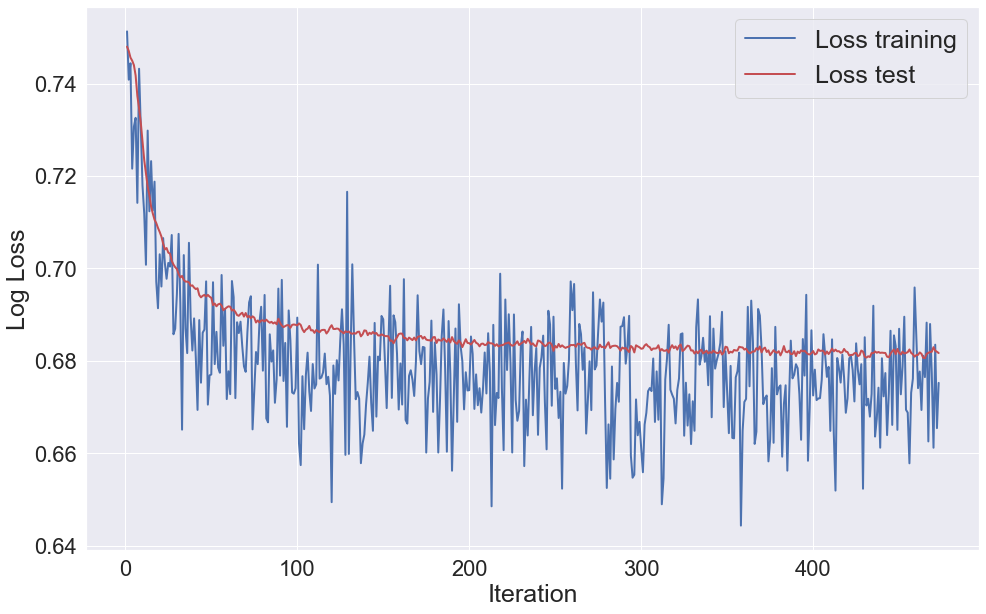

In [63]:
# Plot Loss for k-th fold
plt.figure(figsize=([16,10]))
axis = np.arange(len(cost_train))+1
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

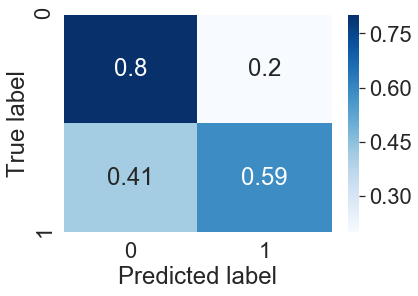

In [64]:
#plot the averaged confusion matrix
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 

In [65]:
#Print averaged accuracy metrics
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

70.35299692583422 % Training accuracy
69.35634123271213 % Test accuracy
0.6675475807546906 % Training f1 score
0.6564593420254754 % Test f1 score


In [66]:
# Run same analysis with scikit learn
from sklearn.neural_network import MLPClassifier
# by default MLPClassifier employes l2 regularization


#print("Test set score: %f" % mlp.score(xtest, ytest))
epochs=1000
batch_size=500
n_features=x.shape[1]
etavec = np.logspace(-4, -1, 4)
lmbvec = np.logspace(-7, -3, 5)
lmbvec[0]=0


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=lmb,
                    solver='sgd', verbose=0, tol=1e-4,batch_size=500, random_state=1,
                    learning_rate_init=etas)

        mlp.fit(xtrain, ytrain.ravel())
        print("Training set score: %f" % mlp.score(xval, yval))
        pred = mlp.predict(xval)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        print('Validation f1_score for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])



Training set score: 0.699548
Validation f1_score for η = 0.0001 & λ = 0.0 = 0.6393100969082522
Training set score: 0.699548
Validation f1_score for η = 0.0001 & λ = 1e-06 = 0.6393100969082522
Training set score: 0.699548
Validation f1_score for η = 0.0001 & λ = 1e-05 = 0.6393100969082522
Training set score: 0.699548
Validation f1_score for η = 0.0001 & λ = 0.0001 = 0.6393100969082522
Training set score: 0.699548
Validation f1_score for η = 0.0001 & λ = 0.001 = 0.6393100969082522
Training set score: 0.707078
Validation f1_score for η = 0.001 & λ = 0.0 = 0.6346405599582653
Training set score: 0.707078
Validation f1_score for η = 0.001 & λ = 1e-06 = 0.6346405599582653
Training set score: 0.707078
Validation f1_score for η = 0.001 & λ = 1e-05 = 0.6346405599582653
Training set score: 0.707078
Validation f1_score for η = 0.001 & λ = 0.0001 = 0.6346405599582653
Training set score: 0.707078
Validation f1_score for η = 0.001 & λ = 0.001 = 0.6346405599582653
Training set score: 0.733434
Validati

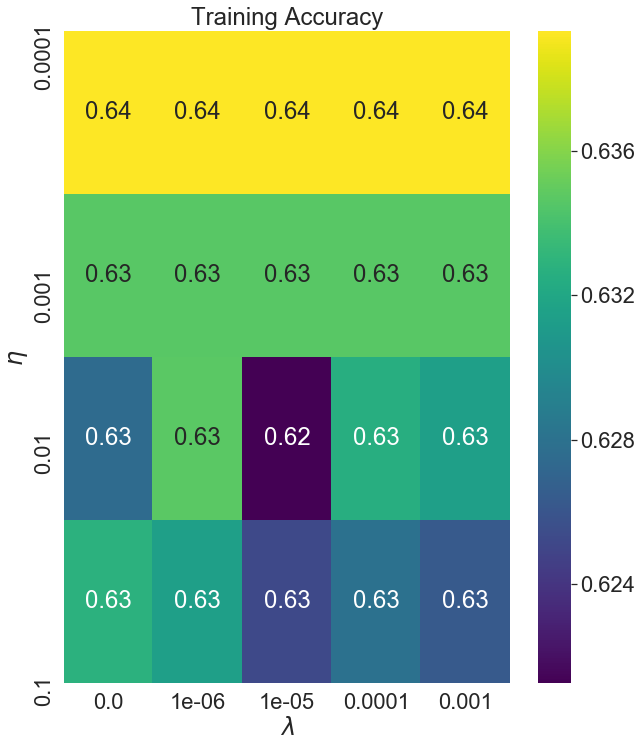

In [67]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [68]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

67.60935143288084
0.6260339573356553
[[1074  271]
 [ 588  719]]


In [69]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)

78.10734463276836
[[4783  508]
 [1817 3512]]
